In [2]:
import numpy as np
import matplotlib.pyplot as plt
import copy, math

In [3]:
def read_csv_to_array(filename):
    data = np.genfromtxt(filename, delimiter=',', dtype=float)
    return data

In [4]:
def compute_gradient(X, y, w, b):
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0
    for i in range(m):
        f_wb = np.dot(X[i], w) + b
        err = f_wb - y[i]
        for j in range(n):
            dj_dw[j] += err * X[i, j]
        dj_db += err
    dj_dw /= m
    dj_db /= m
    return dj_dw, dj_db

In [5]:
def compute_cost(X, y, w, b):
    # mean squared error
    cost = 0
    m = y.shape[0]
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b
        cost += (f_wb_i - y[i])**2
    cost /= 2 * m;
    return cost

In [6]:
def gradient_descent(X, y, w_in, b_in=0, alpha=0.01, num_iterations=10000):
    cost_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    for i in range(num_iterations):
        dj_dw, dj_db = compute_gradient(X, y, w, b)
        b = b - alpha * dj_db
        w = w - alpha * dj_dw
        # save cost at each iteration
        if i < 100000: # prevent resource exhaustion
            cost_history.append(compute_cost(X, y, w, b))
        # print cost at 10 intervals, or each iteration if < 10
        if i % math.ceil(num_iterations / 10) == 0:
            print(f"Iteration {i:4d}: Cost {cost_history[-1]:.2e}",
                  f"w: {w}, b: {b:.3e}")
        if math.isnan(cost_history[-1]):
            raise ValueError(f"Cost is not a number at iteration {i}.")
    return w, b, cost_history

In [7]:
x_train = read_csv_to_array('x_train.csv')
y_train = read_csv_to_array('y_train.csv')

In [8]:
np.set_printoptions(precision=3, suppress=True)

In [9]:
def z_score_normalize(X):
    m,n = X.shape
    z_scores = np.zeros((m, n))
    for i in range(n):
        x_mean = np.mean(X[:, i])
        x_std_dev = np.std(X[:, i])
        z_scores[:, i] = (X[:, i] - x_mean) / x_std_dev
    return z_scores

In [10]:
num_features = x_train.shape[1]
w = np.zeros(num_features)
x_train_normalized = z_score_normalize(x_train)
w, b, J_history = gradient_descent(x_train_normalized, y_train, w, 0, 0.1) # note alpha is much smaller than exercise 2

Iteration    0: Cost 4.52e+04 w: [ 0.49549986  5.92385282  6.0007042   5.99082343  6.04115945 -1.51437394], b: 3.313e+01
Iteration 1000: Cost 3.04e+01 w: [ -0.35422679 -13.87996987  15.69458865  15.19580631  43.50602384
   0.79951258], b: 3.313e+02
Iteration 2000: Cost 2.95e+01 w: [ -0.37313749 -19.72243692  16.34125981  14.14645577  49.70131138
   0.6165902 ], b: 3.313e+02
Iteration 3000: Cost 2.94e+01 w: [ -0.35630613 -20.78223263  16.87286502  13.10501904  51.24294729
   0.51777395], b: 3.313e+02
Iteration 4000: Cost 2.94e+01 w: [ -0.33793041 -20.86815558  17.24210016  12.27771426  51.76863759
   0.45388218], b: 3.313e+02
Iteration 5000: Cost 2.94e+01 w: [ -0.3234523  -20.77073486  17.48271492  11.65045835  52.04522474
   0.40968983], b: 3.313e+02
Iteration 6000: Cost 2.94e+01 w: [ -0.31280449 -20.65212547  17.63222329  11.17898568  52.23972088
   0.37846805], b: 3.313e+02
Iteration 7000: Cost 2.94e+01 w: [ -0.3051146  -20.54383195  17.71966211  10.8240526   52.3926899
   0.35627508

In [11]:
def saveModel(w, b):
    filename = 'model.csv'
    with open(filename, 'wb') as f:
        np.savetxt(f, w, delimiter=',')
    with open(filename, 'ab') as f:
        np.savetxt(f, [b], delimiter=',')

In [12]:
saveModel(w, b)

In [13]:
x_string = ''
wx_string = ''
for i in range(w.shape[0]):
    if i > 0:
        x_string += ', '
        wx_string += ' + '
    x_string += f'x_{i}'
    wx_string += f'{w[i]:.1e} x_{i}'
print(f'f_wb({x_string}) = {wx_string} + {b:.1e}')

f_wb(x_0, x_1, x_2, x_3, x_4, x_5) = -2.9e-01 x_0 + -2.0e+01 x_1 + 1.8e+01 x_2 + 1.0e+01 x_3 + 5.3e+01 x_4 + 3.2e-01 x_5 + 3.3e+02


In [14]:
fx = np.zeros(x_train_normalized.shape[0])
for i in range(x_train_normalized.shape[0]):
    fx[i] = np.dot(x_train_normalized[i], w) + b

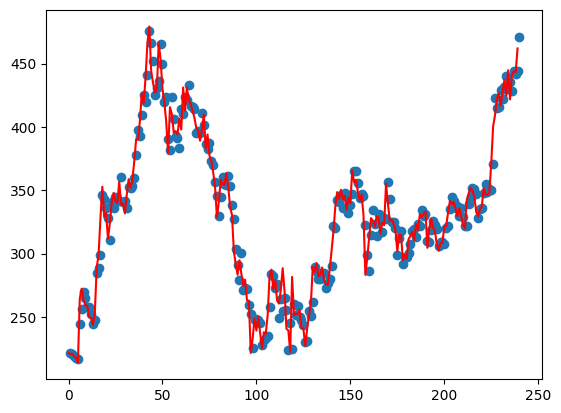

In [15]:
plt.scatter(x_train[:, 0], y_train)
plt.plot(fx, color='r')
plt.show()

In [16]:
x_predict = read_csv_to_array('x_predict.csv')
y_predict = read_csv_to_array('y_predict.csv')
x_predict_normalized = z_score_normalize(x_predict)

In [17]:
predicted = np.zeros(x_predict_normalized.shape[0])
for i in range(x_predict_normalized.shape[0]):
    predicted[i] = np.dot(x_predict_normalized[i], w) + b

In [18]:
for i in range(x_predict_normalized.shape[0]):
    print(f"{int(x_predict_normalized[i, 0])}: |{predicted[i]:.2f} - {y_predict[i]}| = {abs(predicted[i] - y_predict[i]):.2f}")
cost_predict = compute_cost(x_predict_normalized, y_predict, w, b)
print(f"Cost of future predictions: {cost_predict:.2f}")

-1: |349.41 - 443.29| = 93.88
-1: |293.56 - 440.75| = 147.19
0: |466.84 - 447.82| = 19.02
0: |334.35 - 437.57| = 103.22
0: |353.70 - 431.81| = 78.11
0: |337.82 - 436.54| = 98.72
0: |198.45 - 423.53| = 225.08
0: |345.92 - 426.79| = 80.87
1: |295.77 - 434.9| = 139.13
1: |337.49 - 434.73| = 97.24
Cost of future predictions: 7167.63


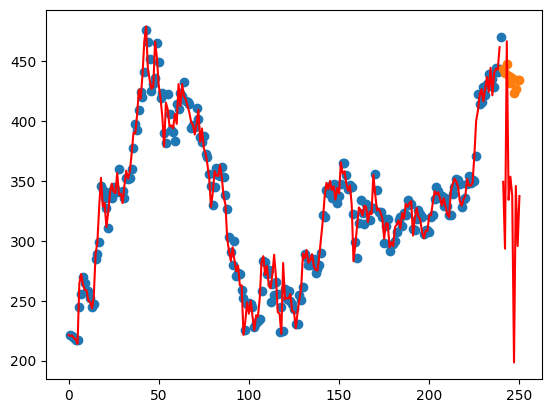

In [19]:
plt.scatter(x_train[:, 0], y_train)
plt.plot(fx, color='r')
plt.scatter(x_predict[:, 0], y_predict)
plt.plot(x_predict[:, 0], predicted, color='r')
plt.show() 